# Подготовка обучающей и тестовой выборки, кросс-валидация и подбор гиперпараметров на примере метода ближайших соседей
## Цель лабораторной работы:
Изучение способов подготовки выборки и подбора гиперпараметров на примере метода ближайших соседей.
## Задание:
Выберите набор данных (датасет) для решения задачи классификации или регрессии.
С использованием метода train_test_split разделите выборку на обучающую и тестовую.
Обучите модель ближайших соседей для произвольно заданного гиперпараметра K. Оцените качество модели с помощью подходящих для задачи метрик.
Произведите подбор гиперпараметра K с использованием GridSearchCV и/или RandomizedSearchCV и кросс-валидации, оцените качество оптимальной модели. Желательно использование нескольких стратегий кросс-валидации.
Сравните метрики качества исходной и оптимальной моделей.

In [1]:
# подключение библиотек
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# загрузка набора данных
data = pd.read_csv('../countries_dataset.csv', decimal=',')

In [3]:
data_nn = data.dropna(axis = 0, how = 'any')
data.shape, data_nn.shape

((227, 20), (179, 20))

In [5]:
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
scaler = MinMaxScaler()
cols_to_scale = ['Population', 'Area (sq. mi.)', 'Pop. Density (per sq. mi.)', 'Coastline (coast/area ratio)', 'Net migration', 'Infant mortality (per 1000 births)', 'Literacy (%)', 'Phones (per 1000)', 'Arable (%)', 'Crops (%)', 'Other (%)', 'Climate', 'Birthrate', 'Deathrate', 'Agriculture', 'Industry', 'Service']
for i in cols_to_scale:
    data[[i]] = scaler.fit_transform(data[[i]])

In [6]:
data_enc = pd.get_dummies(data_nn, prefix=["Region"], columns=["Region"])
data_enc.shape

(179, 30)

In [7]:
data_enc.dtypes

Country                                object
Population                              int64
Area (sq. mi.)                          int64
Pop. Density (per sq. mi.)            float64
Coastline (coast/area ratio)          float64
Net migration                         float64
Infant mortality (per 1000 births)    float64
GDP ($ per capita)                    float64
Literacy (%)                          float64
Phones (per 1000)                     float64
Arable (%)                            float64
Crops (%)                             float64
Other (%)                             float64
Climate                               float64
Birthrate                             float64
Deathrate                             float64
Agriculture                           float64
Industry                              float64
Service                               float64
Region_ASIA (EX. NEAR EAST)             uint8
Region_BALTICS                          uint8
Region_C.W. OF IND. STATES        

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
y = data_enc['GDP ($ per capita)']
x = data_enc[['Phones (per 1000)', 'Birthrate', 'Infant mortality (per 1000 births)', 'Literacy (%)', 'Service']]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((161, 5), (18, 5), (161,), (18,))

In [38]:
knc = KNeighborsRegressor(n_neighbors=4)
knc.fit(x_train, y_train)
y_pred = knc.predict(x_test)
y_test_list = y_test.to_list()
for i in range(len(y_test_list)):
    print(f"{y_test_list[i]} – {y_pred[i]}")

30000.0 – 29150.0
15700.0 – 21125.0
5000.0 – 8850.0
2900.0 – 2025.0
5500.0 – 1775.0
1900.0 – 1200.0
4600.0 – 2875.0
1000.0 – 850.0
4000.0 – 6700.0
4000.0 – 4975.0
4300.0 – 5075.0
600.0 – 1400.0
16900.0 – 11600.0
800.0 – 750.0
4100.0 – 6675.0
800.0 – 1400.0
600.0 – 1050.0
2900.0 – 8125.0


In [12]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, median_absolute_error, r2_score
mean_absolute_error(y_test, y_pred)

2041.6666666666667

In [13]:
mean_squared_error(y_test, y_pred)

7509583.333333333

In [14]:
mean_squared_log_error(y_test, y_pred)

0.3003463829715204

In [15]:
median_absolute_error(y_test, y_pred)

925.0

In [16]:
r2_score(y_test, y_pred)

0.8620294573959907

In [21]:
from sklearn.model_selection import cross_val_score, KFold, LeaveOneOut, ShuffleSplit
scores1_1 = cross_val_score(KNeighborsRegressor(n_neighbors=4), x, y, cv=5, scoring='r2')
scores1_1, np.mean(scores1_1)

(array([0.79364406, 0.59952735, 0.89747745, 0.51299631, 0.87117313]),
 0.7349636593625473)

In [22]:
scores1_2 = cross_val_score(KNeighborsRegressor(n_neighbors=5), x, y, cv=ShuffleSplit(), scoring='r2')
scores1_2, np.mean(scores1_2)

(array([0.92633505, 0.69561954, 0.87644781, 0.79159398, 0.86285373,
        0.41452232, 0.01458919, 0.6629211 , 0.68320703, 0.52682847]),
 0.6454918230935313)

In [23]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
n_range1_1 = np.array(range(1,50,1))
tuned_parameters1_1 = [{'n_neighbors': n_range1_1}]

In [25]:
clf_rs1 = RandomizedSearchCV(KNeighborsRegressor(), tuned_parameters1_1, cv=5, scoring='neg_root_mean_squared_error')
clf_rs1.fit(x, y)

RandomizedSearchCV(cv=5, estimator=KNeighborsRegressor(),
                   param_distributions=[{'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])}],
                   scoring='neg_root_mean_squared_error')

In [26]:
clf_rs1.best_params_

{'n_neighbors': 13}

In [27]:
n_range1_2 = np.array(range(1,11,1))
tuned_parameters1_2 = [{'n_neighbors': n_range1_2}]

In [28]:
clf_gs1 = GridSearchCV(KNeighborsRegressor(), tuned_parameters1_2, cv=5, scoring='neg_root_mean_squared_error')
clf_gs1.fit(x, y)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid=[{'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])}],
             scoring='neg_root_mean_squared_error')

In [29]:
clf_gs1.best_params_

{'n_neighbors': 3}

In [30]:
clf_gs1.cv_results_

{'mean_fit_time': array([0.00299191, 0.00198832, 0.00179429, 0.00180111, 0.00179639,
        0.00179501, 0.00158868, 0.00199571, 0.00159602, 0.00220013]),
 'std_fit_time': array([1.54529543e-03, 1.23615837e-05, 3.99572422e-04, 4.01070271e-04,
        3.99105512e-04, 3.98969722e-04, 4.83231505e-04, 1.68317438e-06,
        4.88948306e-04, 9.76284379e-04]),
 'mean_score_time': array([0.00219846, 0.0016089 , 0.00179591, 0.00179572, 0.00178776,
        0.00159578, 0.00150447, 0.00179405, 0.00159554, 0.00179543]),
 'std_score_time': array([0.00039741, 0.00050025, 0.00040019, 0.00039885, 0.00038844,
        0.00048856, 0.00064448, 0.0003985 , 0.00048827, 0.00039959]),
 'param_n_neighbors': masked_array(data=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'params': [{'n_neighbors': 1},
  {'n_neighbors': 2},
  {'n_neighbors': 3},
  {'n_neighbors': 

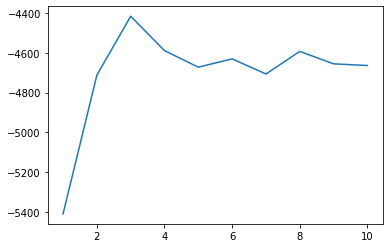

In [32]:
plt.plot(n_range1_2, clf_gs1.cv_results_['mean_test_score'])

In [44]:
clf_gs1.best_estimator_.fit(x_train, y_train)
y_pred_new1 = clf_gs1.best_estimator_.predict(x_test)

In [42]:
# До подбора гиперпараметров
r2_score(y_test, y_pred)

0.8620294573959907

In [45]:
# После подбора гиперпараметров
r2_score(y_test, y_pred_new1)

0.8721403394167041

In [52]:
clf_rs2 = RandomizedSearchCV(KNeighborsRegressor(), tuned_parameters1_1, cv=ShuffleSplit(), scoring='r2')
clf_rs2.fit(x, y)

RandomizedSearchCV(cv=ShuffleSplit(n_splits=10, random_state=None, test_size=None, train_size=None),
                   estimator=KNeighborsRegressor(),
                   param_distributions=[{'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])}],
                   scoring='r2')

In [54]:
clf_rs2.best_params_

{'n_neighbors': 6}

In [56]:
n_range2_2 = np.array(range(1,11,1))
tuned_parameters2_2 = [{'n_neighbors': n_range2_2}]

In [57]:
clf_gs2 = GridSearchCV(KNeighborsRegressor(), tuned_parameters2_2, cv=ShuffleSplit(), scoring='r2')
clf_gs2.fit(x, y)

GridSearchCV(cv=ShuffleSplit(n_splits=10, random_state=None, test_size=None, train_size=None),
             estimator=KNeighborsRegressor(),
             param_grid=[{'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])}],
             scoring='r2')

In [58]:
clf_gs2.best_params_

{'n_neighbors': 3}

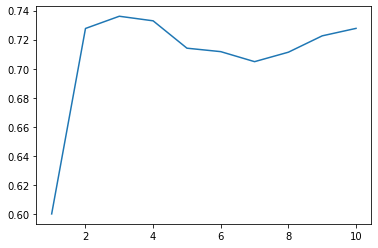

In [59]:
plt.plot(n_range2_2, clf_gs2.cv_results_['mean_test_score'])

In [62]:
clf_gs2.best_estimator_.fit(x_train, y_train)
y_pred_new2 = clf_gs2.best_estimator_.predict(x_test)

In [63]:
# До подбора гиперпараметров
r2_score(y_test, y_pred_new2)

0.8721403394167041

In [64]:
# После подбора гиперпараметров
r2_score(y_test, y_pred_new2)

0.8721403394167041

In [47]:
from sklearn.model_selection import learning_curve, validation_curve
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, optional (default=None)
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like, shape (n_ticks,), dtype float or int
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the dtype is float, it is regarded as a
        fraction of the maximum size of the training set (that is determined
        by the selected validation method), i.e. it has to be within (0, 1].
        Otherwise it is interpreted as absolute sizes of the training sets.
        Note that for classification the number of samples usually have to
        be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.3,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

def plot_validation_curve(estimator, title, X, y, 
                          param_name, param_range, cv, 
                          scoring="accuracy"):
                                                   
    train_scores, test_scores = validation_curve(
        estimator, X, y, param_name=param_name, param_range=param_range,
        cv=cv, scoring=scoring, n_jobs=1)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.title(title)
    plt.xlabel(param_name)
    plt.ylabel(str(scoring))
    plt.ylim(0.0, 1.1)
    lw = 2
    plt.plot(param_range, train_scores_mean, label="Training score",
                 color="darkorange", lw=lw)
    plt.fill_between(param_range, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.4,
                     color="darkorange", lw=lw)
    plt.plot(param_range, test_scores_mean, label="Cross-validation score",
                 color="navy", lw=lw)
    plt.fill_between(param_range, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.2,
                     color="navy", lw=lw)
    plt.legend(loc="best")
    return plt

<module 'matplotlib.pyplot' from 'C:\\Users\\axali\\AppData\\Local\\Programs\\Python\\Python38-32\\lib\\site-packages\\matplotlib\\pyplot.py'>

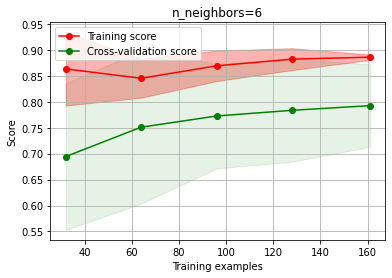

In [65]:
plot_learning_curve(clf_gs2.best_estimator_, 'n_neighbors=6', x, y, cv=ShuffleSplit(), train_sizes=np.linspace(.2, 1.0, 5))

<module 'matplotlib.pyplot' from 'C:\\Users\\axali\\AppData\\Local\\Programs\\Python\\Python38-32\\lib\\site-packages\\matplotlib\\pyplot.py'>

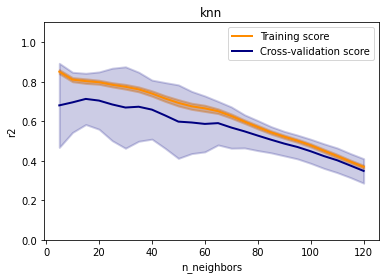

In [67]:
n_range2 = np.array(range(5,125,5))
plot_validation_curve(clf_gs2.best_estimator_, 'knn', x, y, param_name='n_neighbors', param_range=n_range2, cv=ShuffleSplit(),scoring="r2")